<a href="https://colab.research.google.com/github/Pawan-Kumar-Sahu/ML-Library-1/blob/master/Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [7]:
d= pd.read_csv('mnist_train_small.csv',header=None)
data=np.array(d)
print (data)
Y = data[:,0]
print (Y)
X = data[:,1:]
print (X)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
[6 5 7 ... 2 9 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
class log_reg():
    def train_test_split(self,dt,sp=0.6,randomize='False'):   # splitting function
        dt=np.array(dt)
        if randomize=='True':
            dt=list(dt)
            random.shuffle(dt)
            dt=np.array(dt)
        n=dt.shape[1]
        m=dt.shape[0]
        train_dt=dt[:int(sp*m),:]
        test_dt=dt[int(sp*m):,:]
        return train_dt,test_dt
    
    def sigmoid(self,tx):                                # sigmoid function
        return (1/(1+np.exp(-tx)))
    
    def hypo(self):                                      # hypothesis function
        self.hx = []
        self.hx = self.x.dot(self.theta[:-1])
        self.hx = self.hx + self.theta[-1]
        self.hx = np.array(self.sigmoid(self.hx))

    def part_j(self):                                    # function to calculate partial derivative terms
        self.diff = self.hx - self.y
        pj = self.x.T.dot(self.diff)
        w = list(pj)
        w.append(np.sum(self.diff))
        pj = np.array(w)
        return pj*(1/self.m)
    
    def cost(self):                                      # cost/loss function
        self.diff = self.hx - self.y
        return (-1/self.m)*np.sum(self.y*np.log(self.hx) + ((1-self.y)*np.log(1-self.hx)))
    
    def score(self,hhx):                                 # function to calculate accuracy
        yy=self.y.copy()                                 # class wise and even overall
        sc=[]
        for i in np.unique(self.y):
          self.y=yy.copy()
          self.y[self.y!=i]=-10
          val=np.count_nonzero((hhx-self.y)==0)
          print(i,100*(val/np.count_nonzero(yy==i)))
          sc.append((val/np.count_nonzero(yy==i))*100)
        return np.array(sc)

    def learn_curve(self,show='False'):                  # learning curve when 'grad des' is used
        if show=='True':                                 # Error VS no.of iteration graph
            leg = []
            for i in np.unique(self.yy):
                plt.plot(self.learn_x,self.learn_j[i])
                leg.append(i)
            plt.xlabel(" no. of iterations")
            plt.ylabel(" error in classes")
            plt.title(" LEARNING CURVES ")
            plt.legend(leg)
            plt.show()
    
    def learn_curve_mb(self,show='False'):               # learning curve when 'mini batch grad des' is used
        if show=='True':                                 # Error per Batch graph
            leg = []
            for i in np.unique(self.y_all):
                plt.plot(list(range(self.n_o_b)),np.array(self.j_p_b)[:,i])
                leg.append(i)
            plt.xlabel(" no. of Batches")
            plt.ylabel(" Error per Batch")
            plt.title(" LEARNING CURVES ")
            plt.legend(leg)
            plt.show()
    
    def test(self,xt,yt):                                # function to test your model
        self.x=xt
        self.y=yt
        self.m=xt.shape[0]
        pred = np.zeros(self.m)
        pred_val=[]
        self.theta_2d=np.array(self.theta_2d)
        for i in range(self.m):
            v = self.theta_2d[:,:-1].dot(self.x[i])
            v = v + self.theta_2d[:,-1]
            v = np.array(self.sigmoid(v))
            pred_val.append(np.max(v))
            pred[i] = np.argmax(v)
        over_all= self.score(pred)
        print(over_all)
        return pred,np.array(pred_val),(np.sum(over_all)/len(over_all))
    
    def train(self,x,y,f_c='True',itr=50,lr=0.00001):    # function to train your model
        self.x=x
        self.y=y
        self.itr=itr
        self.lr=lr
        self.n=x.shape[1]
        self.m=x.shape[0]
        if f_c=='True':
            self.theta=np.zeros(self.n+1)
            self.theta_2d=[]
            self.j_p_b=[]
            self.n_o_b=0
        self.n_o_b=self.n_o_b + 1
        self.yy = self.y.copy()
        self.j=[]
        self.learn_j=[]
        for index,i in enumerate(np.unique(self.y)):
            k=0
            learn_j_each=[]
            self.learn_x=[]
            self.y=self.yy.copy()
            self.y[self.y!=i]=-1
            self.y[self.y==i]=0
            self.y=self.y+1
            if f_c=='False':
                self.theta=self.theta_2d[index]
            while k < self.itr:
                self.hypo()
                self.theta = self.theta - (self.lr*self.part_j())
                learn_j_each.append(self.cost())
                self.learn_x.append(k)
                k=k+1
            self.learn_j.append(learn_j_each)
            if f_c=='True':
                self.theta_2d.append(self.theta)
            if f_c=='False':
                self.theta_2d=np.array(self.theta_2d)
                self.theta_2d[index]=self.theta
            self.j.append(self.cost())
        self.j_p_b.append(np.array(self.j))
    
    def mini_batch_grad(self,x_all,y_all,batch_size=200,itr_b=43,lr_b=0.000001):
        self.y_all=y_all                                # used when 'mini batch grad des' has to be applied
        n_loop=x_all.shape[0]/batch_size
        if n_loop!=int(n_loop):
            n_loop=int(n_loop)+1
        for i in range(int(n_loop)):
            if i==0:
                self.train(x_all[:batch_size,:],y_all[:batch_size],itr=itr_b,lr=lr_b)
            if i!=0 and i!=n_loop-1:
                self.train(x_all[batch_size*i:batch_size*(i+1),:],y_all[batch_size*i:batch_size*(i+1)],f_c='False',itr=itr_b,lr=lr_b)
            if i==n_loop-1 and i!=0:
                self.train(x_all[batch_size*i:,:],y_all[batch_size*i:],f_c='False',itr=itr_b,lr=lr_b)

obj = log_reg()

In [0]:
train_data,test_data=obj.train_test_split(data,0.8,randomize='True')   # this function splits your dataset into two
print(train_data,train_data.shape)                                     # you can specify ratio of split
print(test_data,test_data.shape)                                       # and whether you want to randomize the order before split

In [0]:
#obj.train(X,Y)                                             # this is for batch grad descent

In [0]:
#obj.learn_curve(show='True')                # this can be used when you use batch grad des 
                                             # otherwise in case mini batch grad des use obj.learn_curve_mb(show='True)
                                             # if you use this for mini batch grad des it will work
                                             # but will show graph of "error VS no. of iterations" for last batch
                                             # use   obj.learn_curve_mb(show='True)  function to get "error per batch" graph

In [0]:
obj.mini_batch_grad(X,Y)                   # this function is designed for mini batch grad des 
                                           # you can give batch size, iteration, learning rate as additional input

In [47]:
d_= pd.read_csv('mnist_test.csv',header=None)
data_=np.array(d_)
#print (data_)
Y_ = data_[:,0]
#print (Y_)
X_ = data_[:,1:]
#print (X_)
prediction, pred_value, accu = obj.test(X_,Y_)    # this will return array of your predicted values
print(accu)                                       # and even the probability value for that prediction as an array
                                                  # and accuracy in both ways-- indivisual class wise
                                                  # and overall accuracy (i havent printed all) 

0 97.6530612244898
1 97.88546255506608
2 88.17829457364341
3 90.3960396039604
4 90.52953156822811
5 81.05381165919282
6 94.67640918580375
7 90.1750972762646
8 82.34086242299796
9 88.30525272547077
[97.65306122 97.88546256 88.17829457 90.3960396  90.52953157 81.05381166
 94.67640919 90.17509728 82.34086242 88.30525273]
90.11938227951177


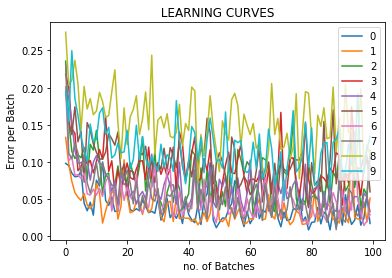

In [48]:
obj.learn_curve_mb(show='True')                  # this is the learning curve graph if u use mini batch grad des